Data sourcing,import
Data cleaning
Data Deduplication
Data Validation
Data Aggregation
Data Visualization

Import libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly import express as px

Import Data

In [23]:
path="J:/Notes/Datasets/Sales.csv"
df=pd.read_csv(path)
#df.head()

Clean Data

In [ ]:
#check missing data
#check missing values
#df.isnull().sum()
df.isnull().any()

Date                False
Day                 False
Month               False
Year                False
Customer_Age        False
Age_Group           False
Customer_Gender     False
Country             False
State               False
Product_Category    False
Sub_Category        False
Product             False
Order_Quantity      False
Unit_Cost           False
Unit_Price          False
Profit              False
Cost                False
Revenue             False
dtype: bool

Data Exploration

In [70]:
#df.info()

In [26]:
#check columns names
df.columns.values.tolist() 

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

Data Deduplication

In [27]:
#df.head()
#Drop unnecessary column Date
df.drop(['Date'], axis=1)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


Data Validation

In [28]:
#wrong revenue calculations create a new column
df['Correct Revenue'] = df['Unit_Price']*df['Order_Quantity']
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Correct Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,960
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,960
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2760
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2400
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,480


In [29]:
#df.describe()

Data Aggregation

In [68]:
df_year = df.groupby('Year',as_index=False).sum()
#df_year.head()


C:\Users\nomid\AppData\Local\Temp\ipykernel_12592\2786553953.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Visualization

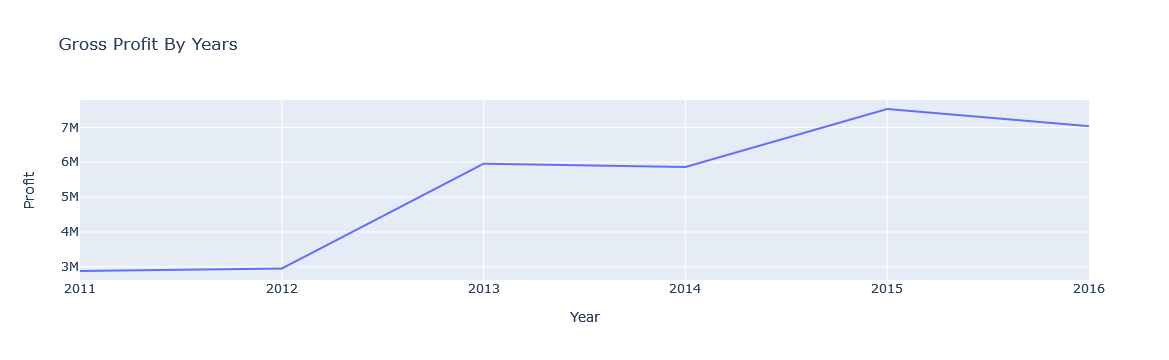

In [71]:
px.line(df_year,x='Year',y='Profit',labels={'x':'Years','y':'Gross Profit'},title='Gross Profit By Years')

Gender comparison

<Axes: xlabel='count', ylabel='Customer_Gender'>

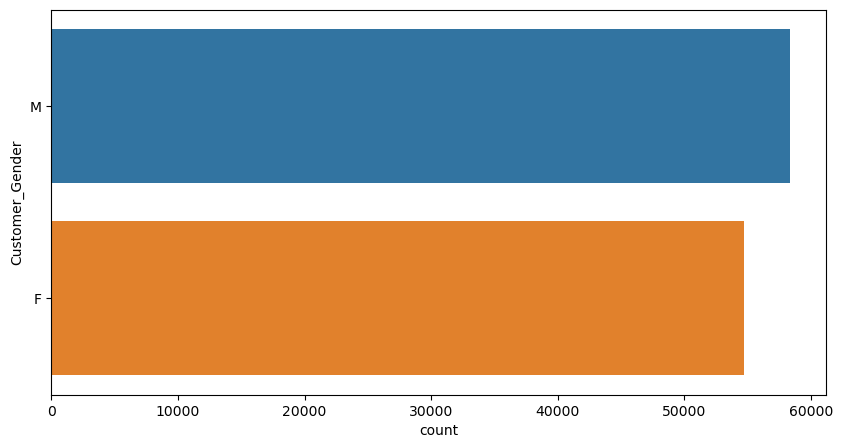

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Customer_Gender'],data=df)

<Axes: xlabel='count', ylabel='Product_Category'>

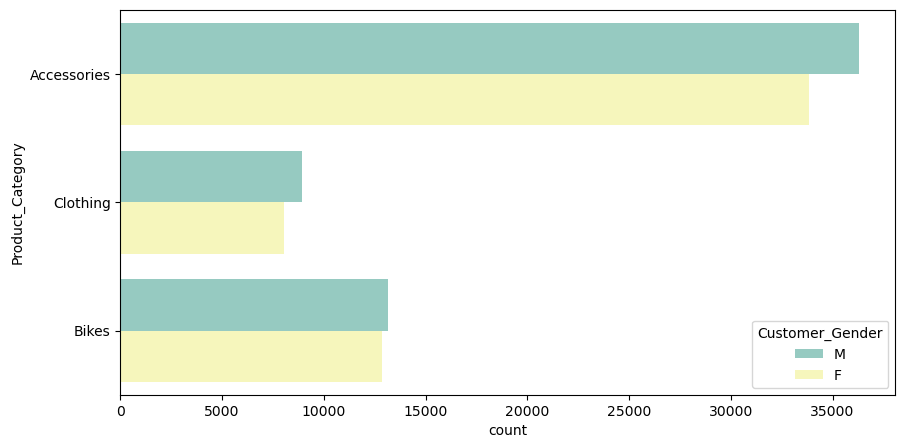

In [49]:
#check prefernce by genders
plt.figure(figsize=(10,5))
sns.countplot(y=df['Product_Category'],data=df,hue=df['Customer_Gender'],linewidth=5, palette="Set3",edgecolor='none')

C:\Users\nomid\AppData\Local\Temp\ipykernel_12592\2280159164.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



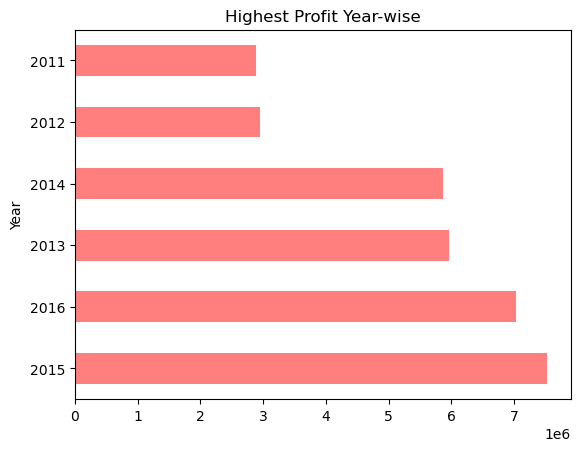

In [63]:
group_year_data = df.groupby('Year').sum()['Profit'].sort_values(ascending=False)
group_year_data.plot(kind='barh', color='red', alpha=0.5, title="Highest Profit Year-wise")
plt.show()